# Solving mazes using IDA* algorithm

## Problem solving by Informed Search and/or Local Search

### 1.	Defining the environment

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

#Metrics
final_path = []
final_cost = []
space_complexity = []
time_complexity = []
maze_list = []
agents_list = []

# goal coordinates for the resprective mazes
scenario_1_goal = (2, 3)
scenario_2_goal = (2, 2)

# define agents
agents = ['r1', 'g1']

#Code Block : Set Initial State (Must handle dynamic inputs)
def dynamic_input():
    try:
        print("Enter numbers between 0 and 5")
        x_start = int(input("Enter x cordinate of start: "))
        y_start = int(input("Enter y cordinate of start: "))
        if (x_start > 5 or y_start > 5 or x_start < 0 or y_start < 0):
            raise Exception("Coordinates out of bounds")
    except:
        raise Exception("Enter valid integer inputs for coordinates.")
    return (x_start, y_start)

In [2]:

def init_maze():
    maze_1 = np.array([[0, 1, 1, 1, 0, 1],
                     [1, 1, 1, 0, 1, 1],
                     [1, 1, 0, 1, 1, 1],
                     [1, 0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0, 1],
                     [1, 1, 1, 0, 1, 1]])
    # declaration of G1 maze using matrix
    maze_2 = np.array([[0, 1, 0, 1, 0, 1],
                    [1, 0, 1, 0, 1, 0],
                    [0, 1, 0, 1, 0, 1],
                    [1, 0, 1, 0, 1, 0],
                    [0, 1, 0, 1, 0, 1],
                    [1, 0, 1, 0, 1, 0]])
    return maze_1, maze_2

def get_agent_color_penalty(maze, point, agent):
    """
    @param maze: input maze
    @param point: current node point
    @param agent: type of agent used
    @returns agent_penalty
    """
    if agent == 'r1':
        if maze[point[0]][point[1]] == 1:
            return 10
        elif maze[point[0]][point[1]] == 0:
            return -10
        else:
            raise Exception("Illegal color code. Use only 0 or 1")
    elif agent == 'g1':
        if maze[point[0]][point[1]] == 1:
            return -10
        elif maze[point[0]][point[1]] == 0:
            return 10
        else:
            raise Exception("Illegal color code. Use only 0 or 1")
    else:
        raise Exception("Illegal agent used. Use either r1 or g1")
        
def get_color_penalty(maze, p1, p2, penalty):
    """
    @param maze: input maze
    @param p1: point1
    @param p2: point2
    @param penalty: penalty value
    @returns color_penalty
    """
    # computing the color penalty
    color_diff = maze[p1[0]][p1[1]] - maze[p2[0]][p2[1]]
    if (color_diff == 0):
        return -1 * penalty
    else:
        return penalty
    
def get_heurestic(maze, goal):
    """
    @param maze: input maze
    @param goal: tupple of the goal coordinates
    @returns heurestic_matrix: where 'heurestic = manhattan_distance + color_penalty'
    """
    maze_h = np.zeros((maze.shape[0], maze.shape[1]))
    for i in range(0, maze.shape[0]):
        for j in range(0, maze.shape[1]):
            maze_h[i][j] = get_manhatttan_distance((i, j), goal) + get_color_penalty(maze, (i, j), goal, 5)
    return maze_h

In [3]:

#Helper Functions 

def get_neighbours(current_node, maze):
    """
    @param current_node: tupple which represents the current node position
    @param maze: matrix representation of the maze
    @returns list of valid neighbours of the current_node
    """
    children = []
    for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        node_position = (
            current_node[0] + new_position[0], current_node[1] + new_position[1])
        if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) - 1) or node_position[1] < 0:
            continue
        children.append(node_position)
    return children

def get_manhatttan_distance(p1, p2):
    """
    @param p1: point1 as tuple
    @param p2: point2 as tuple
    @returns manhattan_distance between two points
    """
    return sum(abs(val1 - val2) for val1, val2 in zip(p1, p2))

def display_metrics():
    for i in range(0, len(agents_list)):
        print("")
        print("AGENT: ", agents_list[i])
        print("SPACE COMPLEXITY: ", space_complexity[i])
        print("TIME COMPLEXITY: ", time_complexity[i])
        print("COST: ", final_cost[i])
        print("PATH: ", final_path[i])
        visualise_path(maze_list[i], final_path[i])
        print("")

def visualise_path(maze, path):
    """
    @param path: list of tuples consisting of the path taken by the algo
    @plots the path on a 2D matrix using matplotlib
    """
    column_labels = list('012345')
    row_labels = list('012345')
    fig, ax = plt.subplots()
    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(0,6,step=1) + 0.5, minor=False)
    ax.set_yticks(np.arange(0,6,step=1) + 0.5, minor=False)
    # for a table-like display
    ax.xaxis.tick_top()
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    cmap = colors.ListedColormap(['Red','Green'])
   # print (maze)
    arr = maze #np.zeros((6, 6))
    pathPos = 0
    for i in path:
#         print ("length of path =" + str(len(path)) + "; pathPos = " + str(pathPos))
        path_y_coordinate = i[0]
        path_x_coordinate = i[1]
        text = ""
        if pathPos == 0:
            #arr[path_y_coordinate][path_x_coordinate] = 2 #BLUE
            text = "START"
        elif pathPos == (len(path)-1):
            #arr[path_y_coordinate][path_x_coordinate] = 4 #Orange
            text = " H   "  
        else:
            #arr[path_y_coordinate][path_x_coordinate] = 3 #Brown
            text = "STEP " + str(pathPos)
        ax.text(path_x_coordinate + 0.5, path_y_coordinate +0.5 , text , color='White', ha="center", va="center")
        pathPos = pathPos + 1
    arr = np.flipud(arr)
    #print (arr)    
    plt.pcolor(arr[::-1],cmap=cmap,edgecolors='k', linewidths=1)
    plt.gca().invert_yaxis()
    plt.show()


In [4]:


def is_goal(node, goal):
    if node == goal:
        return True
    return False


### 2.  IDA* - Informed Search

In [5]:


def iterative_deepening_a_star(maze, heuristic, start, goal, agent):
    """
    @param maze: input maze
    @param heuristic: heuristic maze
    @param start: tupple of the start coordinates
    @param goal: tupple of the goal coordinates
    """
    threshold = heuristic[start[0]][start[1]]
    space = 0
    time = 0
    while True:
        # print("Iteration with threshold: " + str(threshold))
        visited = []
        path = []
        f, goal_test = iterative_deepening_a_star_rec(maze, heuristic, start, goal, 0, threshold, visited, path, agent)
        time += len(visited)
        if(space < len(visited)):
            space = len(visited)
        if goal_test == True:
            # goal test found
            print("GOAL: ", visited)
            print("PATH: ", path)
            print("COST: ", f)
            visualise_path(maze, path)
            final_path.append(path)
            space_complexity.append(space)
            time_complexity.append(time)
            final_cost.append(f)
            agents_list.append(agent)
            maze_list.append(maze)
            return f
        elif f == float("inf") and goal_test == False:
            # if no end node is found after exploring all the nodes, return -1
            return -1
        else:
            # if goal_test not reached, then update the threshold to the minimum of the current path costs
            threshold = f
def iterative_deepening_a_star_rec(maze, heuristic, node, goal, g, threshold, visited, path, agent):
    """
    @param maze: input maze
    @param heuristic: heuristic maze
    @param node: tupple of the current node coordinates
    @param goal: tupple of the goal coordinates
    @param g: current path cost
    @param threshold: threshold of the cost
    @param visited: list of visited node tuples
    @param path: list of tuples consisting of the path taken by the algo
    @returns min: 
    @returns: bool representation of goal_test
    """
    # print("visiting: ", node)
    visited.append(node)
    path.append(node)
    f = g + heuristic[node[0]][node[1]]
    if f > threshold:
        # Pruning here!! Threshold with heuristic
        # print("Pruning at threshodl: ", threshold)
        path.pop()
        return f, False
    if is_goal(node,goal):
        # If goal test passes
        return f, True
    min = float("inf")
    for i in get_neighbours(node, maze):
        # for every neighbour recursively call the ida star algo
        if i not in visited:
            # in the recusrsive function, the path cost is "g + get_color_penalty(maze, i, goal, 10) + 1". Here we are adding path cost penalty as + 1.
            t, goal_test = iterative_deepening_a_star_rec(maze, heuristic, i, goal, g + get_agent_color_penalty(maze, i, agent) + 1, threshold, visited, path, agent)
            if goal_test == True:
                return t, goal_test
            elif t < min:
                min = t
    path.pop()
    return min, False

### 3. Dynamic Input

In [7]:

# user input for the start coordinates
start = dynamic_input()

Enter numbers between 0 and 5
Enter x cordinate of start: 2
Enter y cordinate of start: 3


### 4.	Calling the search algorithms

Agent:  r1
*** Scenario 1 Maze ***
Heuristic: 
[[10. -1. -2. -3.  8. -1.]
 [-1. -2. -3.  6. -3. -2.]
 [-2. -3.  6. -5. -4. -3.]
 [-1.  8. -3. -4. -3.  8.]
 [10. -1. -2. -3.  8. -1.]
 [ 1.  0. -1.  8. -1.  0.]]
GOAL:  [(2, 3)]
PATH:  [(2, 3)]
COST:  -5.0


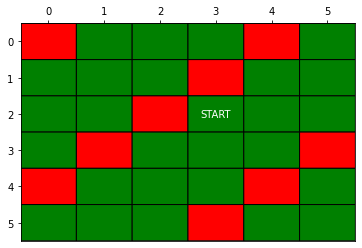

cost -5.0
*** Scenario 2 Maze ***
Heuristic: 
[[-1.  8. -3.  8. -1. 10.]
 [ 8. -3.  6. -3.  8. -1.]
 [-3.  6. -5.  6. -3.  8.]
 [ 8. -3.  6. -3.  8. -1.]
 [-1.  8. -3.  8. -1. 10.]
 [10. -1.  8. -1. 10.  1.]]
GOAL:  [(2, 3), (2, 2)]
PATH:  [(2, 3), (2, 2)]
COST:  -14.0


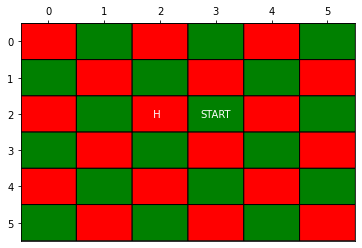

COST -14.0
Agent:  g1
*** Scenario 1 Maze ***
Heuristic: 
[[10. -1. -2. -3.  8. -1.]
 [-1. -2. -3.  6. -3. -2.]
 [-2. -3.  6. -5. -4. -3.]
 [-1.  8. -3. -4. -3.  8.]
 [10. -1. -2. -3.  8. -1.]
 [ 1.  0. -1.  8. -1.  0.]]
GOAL:  [(2, 3)]
PATH:  [(2, 3)]
COST:  -5.0


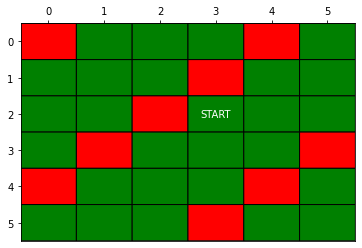

cost -5.0
*** Scenario 2 Maze ***
Heuristic: 
[[-1.  8. -3.  8. -1. 10.]
 [ 8. -3.  6. -3.  8. -1.]
 [-3.  6. -5.  6. -3.  8.]
 [ 8. -3.  6. -3.  8. -1.]
 [-1.  8. -3.  8. -1. 10.]
 [10. -1.  8. -1. 10.  1.]]
GOAL:  [(2, 3), (2, 2)]
PATH:  [(2, 3), (2, 2)]
COST:  6.0


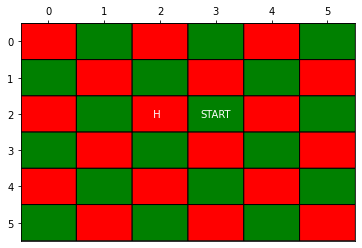

COST 6.0


In [8]:

scenario_1_maze, scenario_2_maze = init_maze()


# define agents
agents = ['r1', 'g1']
for agent in agents:
    print("Agent: ", agent)
    print("*** Scenario 1 Maze ***")
    print("Heuristic: ")
    heuristic = get_heurestic(scenario_1_maze, scenario_1_goal)
    print(heuristic)
    # calling the IDA star algorithm on maze Scenario_1
    dist = iterative_deepening_a_star(scenario_1_maze, heuristic, start, scenario_1_goal, agent)
    print("cost", dist)
    print("*** Scenario 2 Maze ***")
    print("Heuristic: ")
    heuristic = get_heurestic(scenario_2_maze, scenario_2_goal)
    print(heuristic)
    # calling the IDA star algorithm on maze Scenario_2
    dist = iterative_deepening_a_star(scenario_2_maze, heuristic, start, scenario_2_goal, agent)
    print("COST", dist)
     

### 5.	Comparitive Analysis


AGENT:  r1
SPACE COMPLEXITY:  1
TIME COMPLEXITY:  1
COST:  -5.0
PATH:  [(2, 3)]


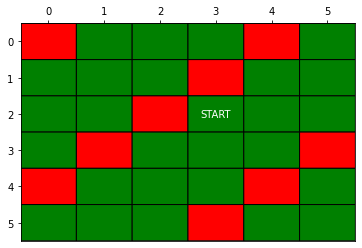



AGENT:  r1
SPACE COMPLEXITY:  2
TIME COMPLEXITY:  2
COST:  -14.0
PATH:  [(2, 3), (2, 2)]


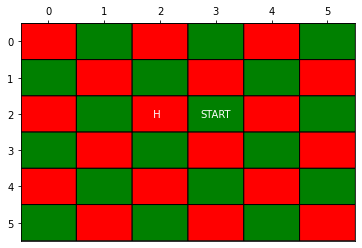



AGENT:  g1
SPACE COMPLEXITY:  1
TIME COMPLEXITY:  1
COST:  -5.0
PATH:  [(2, 3)]


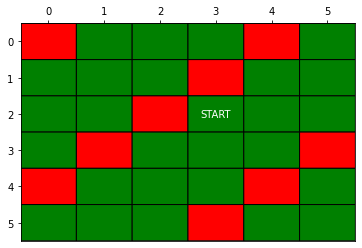



AGENT:  g1
SPACE COMPLEXITY:  2
TIME COMPLEXITY:  2
COST:  6.0
PATH:  [(2, 3), (2, 2)]


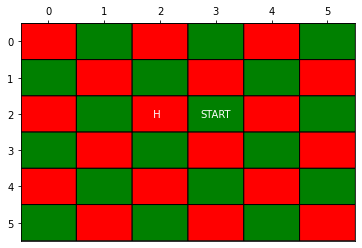

In [10]:

display_metrics()